In [1]:
##--------------------------------------------------

#This notebook is used to check the points image projection alignment

##--------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import copy
import cv2


data_root=r"F:\data"
category="arkit_chair"
object_id="chair_zxQdryerdV3myY9Y"
image_id="034"

In [2]:
occ_path=os.path.join(data_root,"occ_data",category,object_id+".npz")
data_content=np.load(occ_path)
nss_samples=data_content["near_points"]
nss_labels=data_content["near_label"]
inside_samples=nss_samples[nss_labels>0]
inside_samples=inside_samples[0:10000]

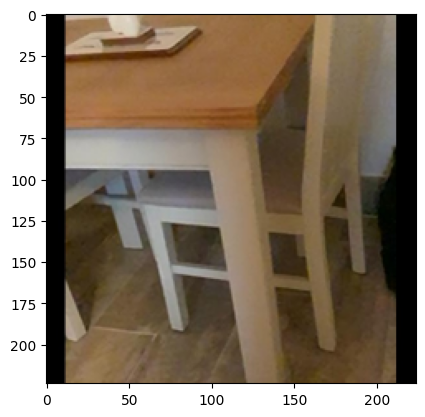

In [6]:
image_folder=os.path.join(data_root,"other_data",category,"6_images",object_id)
proj_mat_folder=os.path.join(data_root,"other_data",category,"8_proj_matrix",object_id)
image_path=os.path.join(image_folder,image_id+".jpg")
proj_mat_path=os.path.join(proj_mat_folder,image_id+".npy")

image=np.asarray(Image.open(image_path))
image=cv2.resize(image,dsize=(224,224))
proj_mat=np.load(proj_mat_path)

plt.imshow(image)

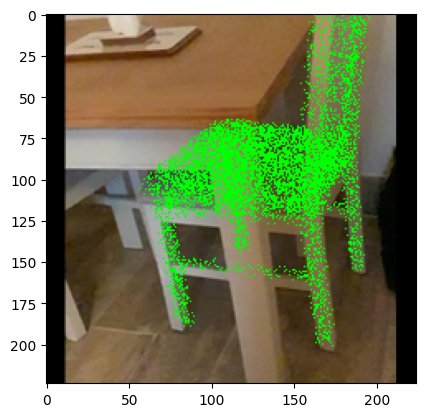

In [7]:
proj_pts=np.dot(inside_samples,proj_mat[0:3,0:3].T)+proj_mat[0:3,3]
proj_x=proj_pts[:,0]/proj_pts[:,2]
proj_y=proj_pts[:,1]/proj_pts[:,2]
proj_x=np.clip(proj_x,a_min=0,a_max=image.shape[1]-1).astype(np.int32)
proj_y=np.clip(proj_y,a_min=0,a_max=image.shape[0]-1).astype(np.int32)
canvas=copy.deepcopy(image)
canvas[proj_y,proj_x]=np.array([0,255,0])
plt.imshow(canvas)